# An analysis of old posts in the dataset

In [2]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv("D:/Dati PRAW/Project_Social_Network_Analysis-main/Project_Social_Network_Analysis-main/scraping data/data/data_subreddit_cleaned.csv",index_col=0)

The posts were filtrated in order to only select posts where from == to, i.e. posts that were scraped from the "hot" list of a subreddit, as opposed to all the other crossposted posts collected after a "hot" crosspost was found.

In [3]:
filtered_data = data[data['from'] == data['to']]

Ordering them by the date of posting:

In [4]:
oldest = filtered_data.sort_values(by="date",ascending = True)
oldest.head(10)

,from,to,id,title,score,date,comments,parent
195358,VeganRights,VeganRights,6zgrjk,How to advocate for vegan meals at your local ...,6.0,1.505179e+09,0.0,VeganSchools
174027,Petroleum,Petroleum,767ooy,Oil will crash to $10 a barrel with electric v...,1.0,1.507957e+09,1.0,energy
144193,Argentinados,Argentinados,79zxke,Radios del Mundo. Genial para conocer nuevas e...,7.0,1.509523e+09,2.0,hackernews
150026,Anarchist_Strategy,Anarchist_Strategy,7fdkbw,Guerrilla ISP Communal Internet Gateways,1.0,1.511621e+09,0.0,anarcho_hackers
162215,DoseDaily,DoseDaily,7puj7g,Not only did Prop. 64 make pot legal in Califo...,1.0,1.515764e+09,0.0,YouShouldKnow
117121,ConfusedTravolta,ConfusedTravolta,7x59a6,You cannot fast travel while enemies are nearby.,355.0,1.518509e+09,3.0,gaming
186623,LittleKittiesBigDogs,LittleKittiesBigDogs,7y7yfv,Funny how that works,80.0,1.518917e+09,0.0,RedditInReddit
186621,LittleKittiesBigDogs,LittleKittiesBigDogs,83elou,It ain't easy being a single mom to a kitten,72.0,1.520709e+09,0.0,thisismylifenow
52732,PoliticalRevolutionDE,PoliticalRevolutionDE,83qiyb,Invitation to Annual Meeting of the Green Part...,2.0,1.520839e+09,0.0,GreenPartyOfDelaware
186613,LittleKittiesBigDogs,LittleKittiesBigDogs,84do4y,samoyed meets little fluff....,60.0,1.521066e+09,1.0,aww


Adding a column with the dates in human-readable form:

In [5]:
oldest['humandate'] = oldest.apply(lambda row : datetime.datetime.fromtimestamp(int(row['date'])).strftime('%Y-%m-%d %H:%M:%S'), axis = 1)

In [6]:
oldest.head()

,from,to,id,title,score,date,comments,parent,humandate
195358,VeganRights,VeganRights,6zgrjk,How to advocate for vegan meals at your local ...,6.0,1.505179e+09,0.0,VeganSchools,2017-09-12 03:10:35
174027,Petroleum,Petroleum,767ooy,Oil will crash to $10 a barrel with electric v...,1.0,1.507957e+09,1.0,energy,2017-10-14 06:54:05
144193,Argentinados,Argentinados,79zxke,Radios del Mundo. Genial para conocer nuevas e...,7.0,1.509523e+09,2.0,hackernews,2017-11-01 08:54:27
150026,Anarchist_Strategy,Anarchist_Strategy,7fdkbw,Guerrilla ISP Communal Internet Gateways,1.0,1.511621e+09,0.0,anarcho_hackers,2017-11-25 15:39:39
162215,DoseDaily,DoseDaily,7puj7g,Not only did Prop. 64 make pot legal in Califo...,1.0,1.515764e+09,0.0,YouShouldKnow,2018-01-12 14:38:14


In [7]:
oldest[oldest['date']<1609459200].shape[0]

8423

In [8]:
post_pre_2021 = oldest[oldest['date']<1609459200]
post_pre_2021

,from,to,id,title,score,date,comments,parent,humandate
195358,VeganRights,VeganRights,6zgrjk,How to advocate for vegan meals at your local ...,6.0,1.505179e+09,0.0,VeganSchools,2017-09-12 03:10:35
174027,Petroleum,Petroleum,767ooy,Oil will crash to $10 a barrel with electric v...,1.0,1.507957e+09,1.0,energy,2017-10-14 06:54:05
144193,Argentinados,Argentinados,79zxke,Radios del Mundo. Genial para conocer nuevas e...,7.0,1.509523e+09,2.0,hackernews,2017-11-01 08:54:27
150026,Anarchist_Strategy,Anarchist_Strategy,7fdkbw,Guerrilla ISP Communal Internet Gateways,1.0,1.511621e+09,0.0,anarcho_hackers,2017-11-25 15:39:39
162215,DoseDaily,DoseDaily,7puj7g,Not only did Prop. 64 make pot legal in Califo...,1.0,1.515764e+09,0.0,YouShouldKnow,2018-01-12 14:38:14
...,...,...,...,...,...,...,...,...,...
128618,BadTurtleNoLettuce,BadTurtleNoLettuce,knp9zp,No handshake for you,304.0,1.609447e+09,18.0,WatchPeopleDieInside,2020-12-31 21:37:07
119171,3B9349145EA67F53,3B9349145EA67F53,knpdil,Well that's one way,1.0,1.609447e+09,0.0,memes,2020-12-31 21:44:25
107363,isthisearth,isthisearth,knpiiq,Aurora Borealis over Iceland,32.0,1.609448e+09,0.0,EarthPorn,2020-12-31 21:54:46
64400,AntiRoadAction,AntiRoadAction,knqvz7,Such a shame,54.0,1.609454e+09,5.0,MapPorn,2020-12-31 23:27:47


The posts that had been posted before 2021 were selected using R on the dataset. After that, with a python script, the members of the subreddits where those posts had been submitted to were collected with a script*. Therefore, subs_pre_2021 contains the number of members of a subreddit with "hot" posts dated older than 2021, 4 months prior to the network scraping.

Note: the number of members of the selected subreddits was collected approximately a month and a half after the initial data scraping. Four subreddits from the partial dataset had been banned in the meanwhile. They have been ignored for the data collection.

In [9]:
subs_pre_2021 = pd.read_csv("D:/Dati PRAW/Project_Social_Network_Analysis-main/Project_Social_Network_Analysis-main/scraping data/data/subscribers_postpre2021.csv",index_col=None)
subs_pre_2021.tail()

,subreddit,subscribers
951,FunnyASF,81
952,anticentrism,2198
953,Pleelb,3
954,holdmybraincells,46790
955,fuckyoujeffbezos,63


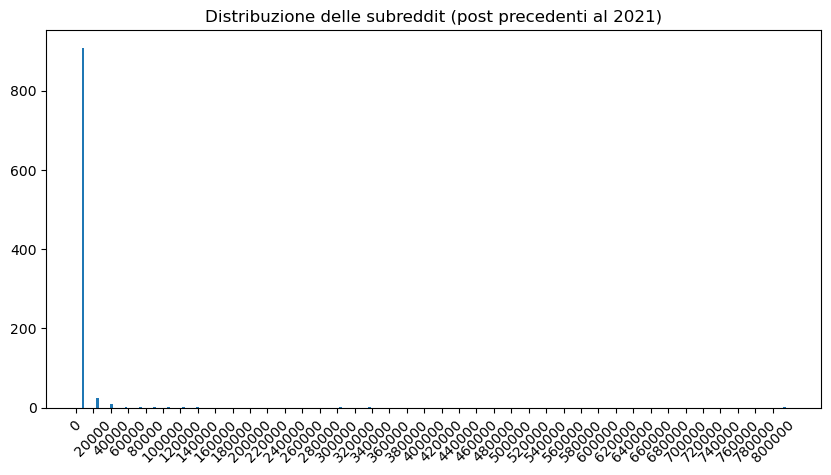

In [10]:
plt.rcParams.update({'figure.figsize':(10,5), 'figure.dpi':100})
plt.hist(subs_pre_2021['subscribers'], bins = 50, rwidth = 0.2)
x=[0,800000]
plt.xticks(np.arange(min(x), max(x)+1, 20000.0), rotation=45)
plt.title('Distribuzione delle subreddit (post precedenti al 2021)')
plt.show()

From the distribution is immediately evident how the subreddits with old "hot" posts are for the most part subreddits with a very low number of members.

With R we extracted the parameters of the distribution (subs_pre_2021):

+ 0   51  383 2077 5111 (lower whisker, first quartile, median, third quartile, upper whisker)
+ 957 rows
+ lower and upper extremes of the notch: 279.5238, 486.4762
+ outliers:
31269   9393   9539  24072  11424   7583   7253  21126 139645   5311   6445
11263  12354   8643  11603  12071  16845   9117  12671  26473 111680   5148
10974  23004  13533  14990  12913  17888  11874  11066  13457  26824 308081
18823  15128  30961  75253   6556 139183   9206   5515  26705  21387  37829
822099   9962  30205   5182  12105   6664   9526   5895  15057  10472   5307
51344   7768  48181  42431   8069  24295   8009   5858   6675  12656  95864
129604  11843  20241  31578  10078   8219   7796  23564   7062  11047  35547
13721   7586   9459   5861   5233  46453  34573  57265   8563   8694   7854
5306  17496   5341   6046   5616   5490   5966  22693  10361  14617   9870
6665 332928  19387  20375  66962  41084  16657  17239   5414  15290  10234
7460  33595   8320   8690   5275   8191  59205   6134  19204  13378  15599
6265  16152   5530  28934  46484   8162   5506  12758  15240  82263  46790

(132 outliers)

Drawing the graph excluding the outliers:

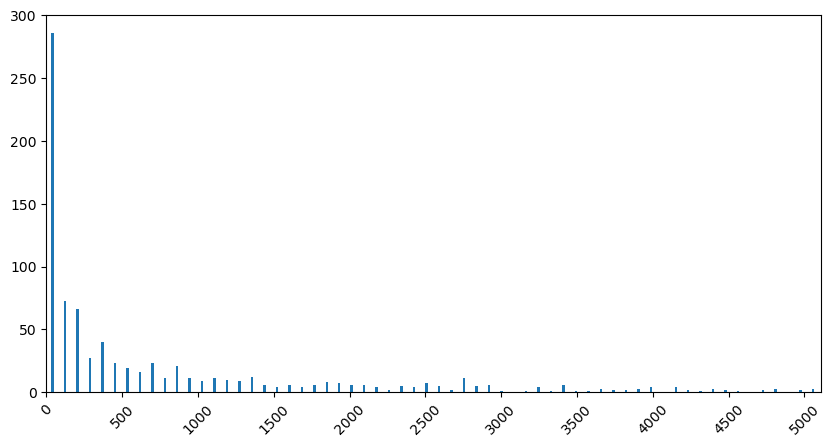

In [11]:
plt.rcParams.update({'figure.figsize':(10,5), 'figure.dpi':100})
plt.hist(subs_pre_2021['subscribers'], bins = 10000, rwidth = 0.2)
x=[0,6000]
plt.xticks(np.arange(min(x), max(x)+1, 500.0), rotation=45)
plt.xlim([0, 5112])
plt.show()

Having very old crossposts among the "hot" ones appears to be a sign of a not very active subreddit.

By randomly checking some posts in the set of posts older than 2021, we realised that pinned posts were included in the data. The pinned status of the posts in the set was retrieved with a python script.

In [4]:
# dataset with posts dated older than 2021 with from == to, and added column pinned (true, false, NaN)
data_p = pd.read_csv("D:/Dati PRAW/Project_Social_Network_Analysis-main/Project_Social_Network_Analysis-main/scraping data/data/pre_2021_pinned.csv",index_col=0)
# none of the posts in the set had been deleted since the original scraping
# the posts on banned subreddits were given a null value

print("Number of pinned posts in the pre-2021 dataset:",data_p[data_p['pinned']==True].shape[0])

Number of pinned posts in the pre-2021 dataset: 80


In [5]:
print("Number of not-pinned posts in the pre-2021 dataset:",data_p[data_p['pinned']==False].shape[0])
print("Number of NULL status posts in the pre-2021 dataset:",data_p[data_p['pinned'].isnull()].shape[0])

Number of not-pinned posts in the pre-2021 dataset: 8319
Number of NULL status posts in the pre-2021 dataset: 24


We counted the number of not pinned posts for each subreddit.

In [14]:
n_posts = []
for row in subs_pre_2021.itertuples():
    n = data_p.loc[(data_p['from']==row[1]) & (data_p['pinned']==False)].shape[0]
    n_posts.append(n)

subs_pre_2021['posts']=n_posts
subs_pre_2021

,subreddit,subscribers,posts
0,VeganRights,537,5
1,Petroleum,1508,1
2,Argentinados,173,1
3,Anarchist_Strategy,1125,7
4,DoseDaily,4,7
...,...,...,...
951,FunnyASF,81,2
952,anticentrism,2198,1
953,Pleelb,3,10
954,holdmybraincells,46790,1


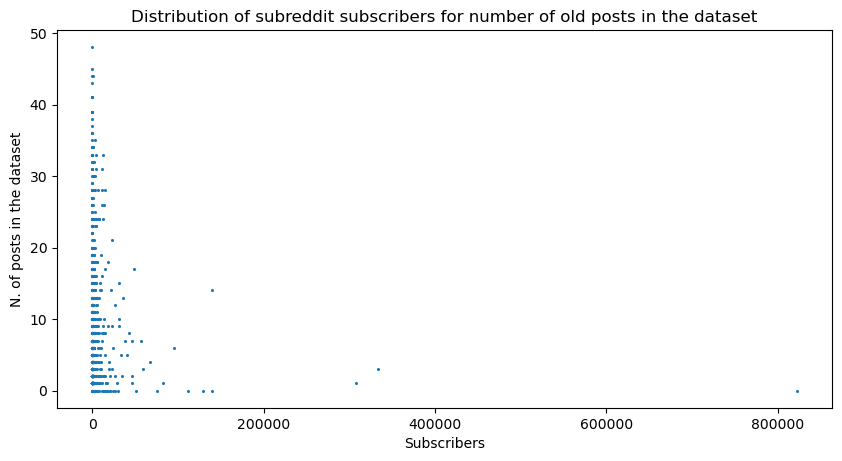

In [15]:
from imp import reload
reload(plt)
plt.scatter(x=subs_pre_2021['subscribers'], y=subs_pre_2021['posts'], s=1.5)
plt.title('Distribution of subreddit subscribers for number of old posts in the dataset')
plt.xlabel('Subscribers')
plt.ylabel('N. of posts in the dataset')
plt.show()

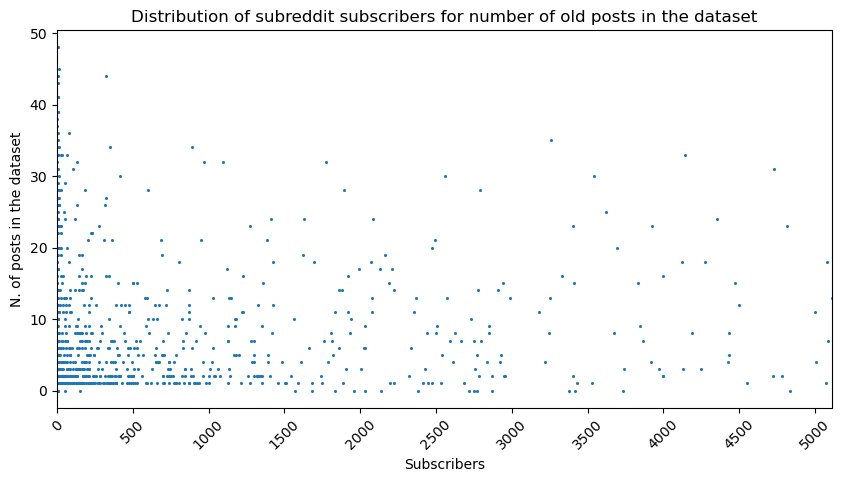

In [16]:
# omitting the outliers
ordered_subs = subs_pre_2021.sort_values(by='subscribers',ascending = True)
plt.scatter(x=subs_pre_2021['subscribers'], y=subs_pre_2021['posts'], s=1.5)
x=[0,6000]
plt.xticks(np.arange(min(x), max(x)+1, 500.0), rotation=45)
plt.xlim([0, 5112])
plt.title('Distribution of subreddit subscribers for number of old posts in the dataset')
plt.xlabel('Subscribers')
plt.ylabel('N. of posts in the dataset')
plt.show()